# Wrangle and Analyze Data

## Table of Contents
- [Gather](#gather)
- [Assess](#assess)
- [Clean](#clean)

In [441]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import config
import matplotlib.pyplot as plt
%matplotlib inline

<a id='gather'></a>
<h2 id="-Gather" style="
    background-color: #555;
    color: #eee;
    padding: 10px 5px;
">Gather</h2>

In [2]:
df_twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(os.getcwd(),'image-predictions.tsv'), mode='wb') as file:
    file.write(response.content)

df_image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [4]:
auth = tweepy.OAuthHandler(config.consumer_key, config.consumer_secret)
auth.set_access_token(config.access_token, config.access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [5]:
tweet_id_list = pd.concat( [df_image_predictions['tweet_id'], 
                          df_twitter_archive_enhanced['tweet_id']], ignore_index=True)

tweet_id_list = tweet_id_list.drop_duplicates()

In [6]:
# this function just to calculate the performance 
time_prv_step = time_step = None
def performance(count,iterations):
    progress = round((count/iterations)*100,2)
    print('processing {}%'.format(progress), end='\r')
    if(count%round(iterations/10) == 0): 
        global time_prv_step
        global time_step
        
        time_prv_step = pd.Timestamp.now() if count == 0 else time_step
        time_step = pd.Timestamp.now()
        
        duration = (time_step - time_prv_step).total_seconds()
        print('{} samples, during {}s'.format(count, round(duration,2) ))
        time_start = time_step

In [31]:
tweets = []
tweet_id_list_error = []
iterations = tweet_id_list.shape[0]
count = 0
for tweet_id in tweet_id_list:
    performance(count, iterations)
    count += 1
    try:
        tweets.append(api.get_status(tweet_id)._json)
    except Exception as e:
        print(str(tweet_id) + ": " + str(e))
        tweet_id_list_error.append(tweet_id)

df_tweets = pd.DataFrame(df_tweets)
df_tweets.to_csv('tweets.csv', index=False)

0 samples, during 0.0s
236 samples, during 237.16s
472 samples, during 216.98s
680055455951884288: [{'code': 144, 'message': 'No status found with that ID.'}]
708 samples, during 209.0s


Rate limit reached. Sleeping for: 77


944 samples, during 285.19s
1180 samples, during 212.78s
754011816964026368: [{'code': 144, 'message': 'No status found with that ID.'}]
1416 samples, during 214.6s
802247111496568832: [{'code': 144, 'message': 'No status found with that ID.'}]
1652 samples, during 201.68s
829374341691346946: [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 102


837012587749474308: [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778: [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648: [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984: [{'code': 144, 'message': 'No status found with that ID.'}]
1888 samples, during 319.52s
851953902622658560: [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320: [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745: [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921: [{'code': 144, 'message': 'No status found with that ID.'}]
888202515573088257: [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937: [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329: [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744: [{'code': 144, 'message': 'No status found with that ID.'}]
85660299358

In [9]:
df_tweets = pd.read_csv('tweets.csv')

> There are 22 tweets that no longer exist.

<a id='assess'></a>
<h2 id="-Gather" style="
    background-color: #555;
    color: #eee;
    padding: 10px 5px;
">Assess</h2>

<h3 id="-Gather" style="
    background-color: #bbb;
    color: #fff;
    padding: 10px 5px;
">twitter_archive_enhanced table</h3>

In [11]:
df_twitter_archive_enhanced.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
204,852936405516943360,NaN,NaN,2017-04-14 17:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I usually only share these on F...,8.316501e+17,4.196984e+09,2017-02-14 23:43:18 +0000,"http://www.gofundme.com/bluethewhitehusky,http...",13,10,None,None,None,None,None
2105,670474236058800128,NaN,NaN,2015-11-28 05:28:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Honor to rate this dog. Great teeth. Nice horn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670474236...,10,10,None,None,None,None,None
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None
2009,672254177670729728,NaN,NaN,2015-12-03 03:21:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rolf. He's having the time of his life...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672254177...,11,10,Rolf,None,None,pupper,None
2198,668815180734689280,NaN,NaN,2015-11-23 15:35:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a wild Toblerone from Papua New Guinea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668815180...,7,10,a,None,None,None,None
917,756939218950160384,NaN,NaN,2016-07-23 19:49:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jax. He is a majestic mountain pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756939218...,12,10,Jax,None,None,pupper,None
713,784183165795655680,NaN,NaN,2016-10-07 00:06:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Reginald. He's one magical puppo. Aero...,NaN,NaN,NaN,https://vine.co/v/5ghHLBMMdlV,12,10,Reginald,None,None,None,puppo
289,838201503651401729,NaN,NaN,2017-03-05 01:36:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Sunny. He can take down a ...,8.207497e+17,4.196984e+09,2017-01-15 21:49:15 +0000,https://twitter.com/dog_rates/status/820749716...,13,10,Sunny,None,None,None,None
523,809448704142938112,NaN,NaN,2016-12-15 17:23:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I call this one ""A Blep by the Sea"" 12/10 http...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/809448704...,12,10,None,None,None,None,None
1039,744234799360020481,NaN,NaN,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,None,None,None


In [55]:
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [57]:
df_twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [25]:
for col in df_twitter_archive_enhanced.columns:
    print(df_twitter_archive_enhanced[col].value_counts().count(), '\t', col)

2356 	 tweet_id
77 	 in_reply_to_status_id
31 	 in_reply_to_user_id
2356 	 timestamp
4 	 source
2356 	 text
181 	 retweeted_status_id
25 	 retweeted_status_user_id
181 	 retweeted_status_timestamp
2218 	 expanded_urls
40 	 rating_numerator
18 	 rating_denominator
957 	 name
2 	 doggo
2 	 floofer
2 	 pupper
2 	 puppo


In [50]:
df_twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

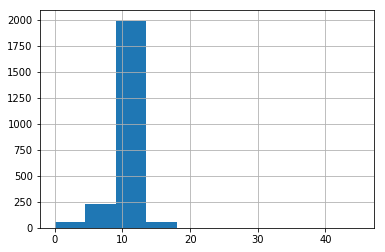

In [452]:
df_twitter_archive_enhanced[df_twitter_archive_enhanced.rating_numerator < 50].rating_numerator.hist()

In [135]:
df_twitter_archive_enhanced.text.str.contains(r'\d+\/\d+').value_counts()

True    2356
Name: text, dtype: int64

In [134]:
df_twitter_archive_enhanced.text.str.extract(r'(?P<text>\d+\/\d+)').text.value_counts()

12/10      558
11/10      463
10/10      461
13/10      351
9/10       156
8/10       102
14/10       54
7/10        53
5/10        37
6/10        32
3/10        19
4/10        15
2/10         9
1/10         8
4/20         2
9/11         2
75/10        2
420/10       2
15/10        2
0/10         2
45/50        1
144/120      1
17/10        1
666/10       1
7/11         1
60/50        1
1776/10      1
84/70        1
88/80        1
143/130      1
121/110      1
182/10       1
11/15        1
20/16        1
50/50        1
204/170      1
99/90        1
1/2          1
26/10        1
007/10       1
960/00       1
165/150      1
27/10        1
80/80        1
44/40        1
24/7         1
Name: text, dtype: int64

In [144]:
# retweets in tweets
df_twitter_archive_enhanced[
    df_twitter_archive_enhanced.retweeted_status_id.isin(df_twitter_archive_enhanced.tweet_id)
].shape[0]


156

In [145]:
# replies in tweets
df_twitter_archive_enhanced[
    df_twitter_archive_enhanced.in_reply_to_status_id.isin(df_twitter_archive_enhanced.tweet_id)
].shape[0]

44

<h3 id="-Gather" style="
    background-color: #bbb;
    color: #fff;
    padding: 10px 5px;
">image_predictions table</h3>

In [54]:
df_image_predictions.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
972,706644897839910912,https://pbs.twimg.com/ext_tw_video_thumb/70664...,1,space_heater,0.137871,False,Chihuahua,0.132928,True,cougar,0.113866,False
1397,768193404517830656,https://pbs.twimg.com/media/Cqkr0wiW8AAn2Oi.jpg,1,lion,0.396984,False,ram,0.300851,False,cheetah,0.094474,False
1189,739606147276148736,https://pbs.twimg.com/media/CkOb3FXW0AAUL_U.jpg,3,Blenheim_spaniel,0.933755,True,cocker_spaniel,0.041719,True,Brittany_spaniel,0.006713,True
1572,795076730285391872,https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg,2,gas_pump,0.676439,False,harvester,0.049995,False,swing,0.044660,False
1263,749036806121881602,https://pbs.twimg.com/media/CmUciKgWIAA97sH.jpg,1,sulphur-crested_cockatoo,0.960276,False,West_Highland_white_terrier,0.019522,True,Samoyed,0.006396,True
931,703079050210877440,https://pbs.twimg.com/media/CcHWqQCW8AEb0ZH.jpg,2,Pembroke,0.778503,True,Shetland_sheepdog,0.093834,True,Cardigan,0.060296,True
566,678334497360859136,https://pbs.twimg.com/media/CWntoDVWcAEl3NB.jpg,1,Norfolk_terrier,0.378643,True,golden_retriever,0.095594,True,kelpie,0.085309,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
845,695095422348574720,https://pbs.twimg.com/media/CaV5mRDXEAAR8iG.jpg,1,papillon,0.227784,True,Chihuahua,0.218128,True,Border_collie,0.093457,True
1945,862096992088072192,https://pbs.twimg.com/media/C_bIo7QXYAAGfPu.jpg,2,chow,0.677589,True,Pomeranian,0.270648,True,Pekinese,0.038110,True


In [56]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [194]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [59]:
for col in df_image_predictions.columns:
    print(df_image_predictions[col].value_counts().count(), '\t', col)

2075 	 tweet_id
2009 	 jpg_url
4 	 img_num
378 	 p1
2006 	 p1_conf
2 	 p1_dog
405 	 p2
2004 	 p2_conf
2 	 p2_dog
408 	 p3
2006 	 p3_conf
2 	 p3_dog


In [146]:
df_image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
Cardigan                      19
web_site                      19
Shetland_sheepdog             18
beagle                        18
teddy                         18
Eskimo_dog                    18
Maltese_dog                   18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [152]:
df_image_predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Eskimo_dog                         27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
chow                               20
toy_terrier                        20
malinois                           20
Samoyed                            20
miniature_pinscher                 20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [153]:
df_image_predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pomeranian                        29
toy_poodle                        29
Pekinese                          29
Great_Pyrenees                    27
Pembroke                          27
Chesapeake_Bay_retriever          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L

In [66]:
len(df_twitter_archive_enhanced)

2356

In [193]:
x = ['doggo', 'floofer', 'pupper', 'puppo']
y = pd.DataFrame(
    list(df_image_predictions.p1)+list(df_image_predictions.p2)+list(df_image_predictions.p3)
    ,columns=['type']
)

print(len(y))
print(len(y.drop_duplicates()))
print(y.drop_duplicates().isin(x).type.value_counts())

6225
634
False    634
Name: type, dtype: int64


In [201]:
df_image_predictions.query('p1_dog == False & p2_dog == False & p3_dog == False').shape[0]

324

<h3 id="-Gather" style="
    background-color: #bbb;
    color: #fff;
    padding: 10px 5px;
">tweets table</h3>

In [481]:
df_tweets.sample(10)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
205,NaN,NaN,Thu Nov 26 16:59:01 +0000 2015,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 669923316447113216, 'id_str'...",232,False,NaN,669923323644657664,669923323644657664,...,NaN,NaN,NaN,57,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1996,NaN,NaN,Fri Jun 23 01:10:23 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 878057599261745152, 'id_str'...",40708,False,NaN,878057613040115712,878057613040115712,...,NaN,NaN,NaN,6513,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2003,NaN,NaN,Tue Jun 27 00:10:17 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 879492035853660161, 'id_str'...",22692,False,NaN,879492040517615616,879492040517615616,...,NaN,NaN,NaN,3051,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. He thinks you should measure e...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
533,NaN,NaN,Tue Dec 15 22:52:02 +0000 2015,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 676897528592392192, 'id_str'...",2288,False,NaN,676897532954456065,676897532954456065,...,NaN,NaN,NaN,739,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Exotic handheld dog here. Appears unathletic. ...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1336,NaN,NaN,Thu Jul 28 01:00:57 +0000 2016,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 758467147756691456, 'id_str'...",4983,False,NaN,758467244762497024,758467244762497024,...,NaN,NaN,NaN,2344,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1786,NaN,NaN,Fri Feb 10 16:53:37 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,10184,False,NaN,830097400375152640,830097400375152640,...,NaN,NaN,NaN,3143,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Meet Samson. He's absolute fluffy perfection. ...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
406,NaN,NaN,Mon Dec 07 03:40:24 +0000 2015,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 673708601312178176, 'id_str'...",1083,False,NaN,673708611235921920,673708611235921920,...,NaN,NaN,NaN,293,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Riley. She's just an adorable football...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1941,NaN,NaN,Sat May 13 16:33:49 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,23466,False,NaN,863432100342583297,863432100342583297,...,NaN,NaN,NaN,5159,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Belle. She's never been more pupset. E...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
373,NaN,NaN,Sat Dec 05 04:00:04 +0000 2015,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 672988581774942208, 'id_str'...",982,False,NaN,672988786805112832,672988786805112832,...,NaN,NaN,NaN,295,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Schnozz. He's had a blurred tail since...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1022,NaN,NaN,Thu Mar 17 01:55:02 +0000 2016,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 710283263395246080, 'id_str'...",2199,False,NaN,710283270106132480,710283270106132480,...,NaN,NaN,NaN,535,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Gunner. He's a Figamus Newton. King of.

In [137]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2334 non-null object
entities                         2334 non-null object
extended_entities                1819 non-null object
favorite_count                   2334 non-null int64
favorited                        2334 non-null bool
geo                              0 non-null float64
id                               2334 non-null int64
id_str                           2334 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  2334 non-null bool
lang                             2334 non-null o

In [138]:
for col in df_tweets.columns:
    print(df_tweets[col].value_counts().count(), '\t', col)

0 	 contributors
0 	 coordinates
2334 	 created_at
2240 	 entities
1819 	 extended_entities
1988 	 favorite_count
1 	 favorited
0 	 geo
2334 	 id
2334 	 id_str
30 	 in_reply_to_screen_name
76 	 in_reply_to_status_id
76 	 in_reply_to_status_id_str
30 	 in_reply_to_user_id
30 	 in_reply_to_user_id_str
2 	 is_quote_status
9 	 lang
1 	 place
1 	 possibly_sensitive
1 	 possibly_sensitive_appealable
24 	 quoted_status
26 	 quoted_status_id
26 	 quoted_status_id_str
1746 	 retweet_count
1 	 retweeted
165 	 retweeted_status
4 	 source
2334 	 text
2 	 truncated
89 	 user


In [140]:
df_tweets.possibly_sensitive.value_counts()

False    2200
Name: possibly_sensitive, dtype: int64

### Quality
#### `twitter_archive_enhanced` table
- There are "None" as value needs to be corrected.
- There are 4 columns, end with `_id`, are float64 type while they need to be int64.
- There are 2 columns, end with `timestamp`, are object type while they need to be time formate.
- `source` column has values in HTML fromat.
- `rating_denominator` has values differ 10.
- `rating_numerator` has anomalous values >= 50 which are outliers.
- There are 156 tweets as retweets.

#### `twitter_archive_enhanced` table
- there are 324 observations are not predected as a dog.

#### `tweets` table
- There are columns should be droped becuase either they have 1 repeated value or nothing.

### Tidiness
- "doggo", "floofer", "pupper" & "puppo" columns of "twitter_archive_enhanced" have to be values in the new column called "type".
- all unwanted columns of "tweets" should be removed.
- all unwanted columns of "twitter_archive_enhanced" should be removed.
- join all tables to create `twitter_archive_master.csv`.

<a id='clean'></a>
<h2 id="-Gather" style="
    background-color: #555;
    color: #eee;
    padding: 10px 5px;
">Clean</h2>

In [751]:
df2_twitter_archive_enhanced = df_twitter_archive_enhanced.copy()
df2_image_predictions = df_image_predictions.copy()
df2_tweets = df_tweets.copy()

<h3 id="-Gather" style="
    background-color: #bbb;
    color: #fff;
    padding: 10px 5px;
">twitter_archive_enhanced table</h3>

## There are "None" as value needs to be corrected.

### Define

> change "None" value to be np.nan

### Code

In [752]:
df2_twitter_archive_enhanced = df2_twitter_archive_enhanced.applymap(lambda x: np.nan if x == 'None' else x)

### Test

In [753]:
# if there is a different of counts, means it is correct
(df_twitter_archive_enhanced.count() == df2_twitter_archive_enhanced.count()).all() != True

True

## There are 4 columns, end with `_id`, are float64 type while they need to be int64.

### Define

> change the type of columns end with `_id` from float64 to int64.

### Code

In [754]:
for col in df2_twitter_archive_enhanced.columns[df2_twitter_archive_enhanced.columns.str.endswith('_id')]:
    df2_twitter_archive_enhanced[col] = df2_twitter_archive_enhanced[col].fillna(0)
    df2_twitter_archive_enhanced[col] = df2_twitter_archive_enhanced[col].astype('int64')

### Test

In [755]:
df2_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         2356 non-null int64
in_reply_to_user_id           2356 non-null int64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null int64
retweeted_status_user_id      2356 non-null int64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: int64(7), object(10)
memory usage

## There are 2 columns, end with `timestamp`, are object type while they need to be `timestamp`.

### Define

> change the type of columns end with `timestamp` from object to timestamp. 

### Code

In [756]:
for col in df2_twitter_archive_enhanced.columns[df2_twitter_archive_enhanced.columns.str.endswith('timestamp')]:
    df2_twitter_archive_enhanced[col] = pd.to_datetime(df2_twitter_archive_enhanced[col])

### Test

In [757]:
df2_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         2356 non-null int64
in_reply_to_user_id           2356 non-null int64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null int64
retweeted_status_user_id      2356 non-null int64
retweeted_status_timestamp    181 non-null datetime64[ns, UTC]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: datetim

## `source` column has values in HTML fromat.

### Define

> correct the value by remvoing HMTL tag

### Code

In [758]:
df2_twitter_archive_enhanced['source'] = df2_twitter_archive_enhanced.source.str.replace('<[^>]*>','')

### Test

In [759]:
df2_twitter_archive_enhanced.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

## `rating_denominator` has values differ 10.

### Define

> remove all observations have `rating_denominator` differ 10.

### Code

In [760]:
df2_twitter_archive_enhanced.drop(df2_twitter_archive_enhanced[
    df2_twitter_archive_enhanced.rating_denominator != 10
].index, inplace=True)

### Test

In [761]:
# the lengths should be difference
df2_twitter_archive_enhanced.shape[0] != df_twitter_archive_enhanced.shape[0]

True

## `rating_numerator` has anomalous values >= 50 which are outliers.

### Define

> remvoe all observations have `rating_numerator` >= 50.

### Code

In [762]:
df2_twitter_archive_enhanced.drop(
    df2_twitter_archive_enhanced[df2_twitter_archive_enhanced.rating_numerator >= 50].index
, inplace=True)

### Test

In [763]:
df2_twitter_archive_enhanced.groupby('rating_numerator').rating_numerator.count()

rating_numerator
0       2
1       8
2       9
3      19
4      15
5      37
6      32
7      54
8     102
9     156
10    461
11    463
12    558
13    351
14     54
15      2
17      1
26      1
27      1
Name: rating_numerator, dtype: int64

## There are 156 tweets as retweets.

### Define

> remove all observations which are actually retweets.

### Code

In [764]:
df2_twitter_archive_enhanced.drop(
    df2_twitter_archive_enhanced[
        df2_twitter_archive_enhanced.retweeted_status_id.isin(df2_twitter_archive_enhanced.tweet_id)
    ].index,
    inplace=True
)

### Test

In [765]:
df2_twitter_archive_enhanced.shape[0] != df_twitter_archive_enhanced.shape[0]

True

<h3 id="-Gather" style="
    background-color: #bbb;
    color: #fff;
    padding: 10px 5px;
">image_predictions table</h3>

## there are 324 observations are not predected as a dog.

### Define

> remove all observations were not predected as a dog.

### Code

In [766]:
df2_image_predictions.drop(
    df2_image_predictions.query('p1_dog == False & p2_dog == False & p3_dog == False').index
    , inplace=True
)

### Test

In [767]:
# they should be not equal
df2_image_predictions.shape[0] != df_image_predictions.shape[0]

True

<h3 id="-Gather" style="
    background-color: #bbb;
    color: #fff;
    padding: 10px 5px;
">twitter_archive_enhanced table</h3>

## There are columns should be droped becuase either they have 1 repeated value or nothing.

### Define

> remove all columns that have 1 repeatted value or nothing.

### Code

In [768]:
cols = []
for col in df2_tweets.columns:
    if(df2_tweets[col].value_counts().count() <=1):
        cols.append(col)


In [769]:
df2_tweets.drop(cols, axis=1, inplace=True)

### Test

In [770]:
for col in df2_tweets.columns:
    print(df2_tweets[col].value_counts().count(), '\t', col)

2334 	 created_at
2240 	 entities
1819 	 extended_entities
1988 	 favorite_count
2334 	 id
2334 	 id_str
30 	 in_reply_to_screen_name
76 	 in_reply_to_status_id
76 	 in_reply_to_status_id_str
30 	 in_reply_to_user_id
30 	 in_reply_to_user_id_str
2 	 is_quote_status
9 	 lang
24 	 quoted_status
26 	 quoted_status_id
26 	 quoted_status_id_str
1746 	 retweet_count
165 	 retweeted_status
4 	 source
2334 	 text
2 	 truncated
89 	 user


<h3 id="-Gather" style="
    background-color: #bbb;
    color: #fff;
    padding: 10px 5px;
">Tidiness</h3>

## all unwanted columns of `tweets` should be removed.


In [771]:
df2_tweets.drop(
    df2_tweets.columns.difference(['id', 'favorite_count', 'retweet_count']), axis=1, inplace=True
)

## ## all unwanted columns of `twitter_archive_enhanced` should be removed.


In [772]:
df2_twitter_archive_enhanced.drop(
    ['in_reply_to_status_id',
    'in_reply_to_user_id',
    'retweeted_status_id',
    'retweeted_status_user_id',
    'retweeted_status_timestamp'], axis=1, inplace=True
)

## join all tables to create `twitter_archive_master.csv`.

In [773]:
df2_tweets.rename({'id':'tweet_id'}, axis=1, inplace=True)

In [774]:
df_twitter_archive_master = df2_image_predictions.merge(
    df2_tweets, on='tweet_id', how='outer'
).merge(
    df2_twitter_archive_enhanced, on='tweet_id', how='outer'
)

In [780]:
df2_twitter_archive_master = df_twitter_archive_master.copy()

## `doggo`, `floofer`, `pupper` & `puppo` columns of "twitter_archive_enhanced" have to be values in the new column called `type`.


In [782]:
value_vars = ['doggo','floofer','pupper','puppo']
cols = df2_twitter_archive_master.columns.difference(value_vars)

df2_twitter_archive_master = df2_twitter_archive_master.melt(
    id_vars=cols, value_vars=value_vars, var_name='stage', value_name='stage_value'
)

In [788]:
df2_twitter_archive_master.to_csv('twitter_archive_master.csv')